In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import sympy
sympy.init_printing()

In [2]:
# Shell Heavy Oil system
def G(s):
    return numpy.array([[4.05 * numpy.exp(-27*s) / (50*s + 1),
                         1.77 * numpy.exp(-28*s) / (60*s + 1),
                         5.88 * numpy.exp(-27*s) / (50*s + 1)],
                        [5.39 * numpy.exp(-18*s) / (50*s + 1),
                         5.72 * numpy.exp(-14*s) / (60*s + 1),
                         6.90 * numpy.exp(-15*s) / (40*s + 1)],
                        [4.38 * numpy.exp(-20*s) / (33*s + 1),
                         4.42 * numpy.exp(-22*s) / (44*s + 1),
                         7.20 * numpy.exp(-0*s) / (19*s + 1)]])

## Pseudo-diag

In [3]:
order = 4
N = 3
ws = numpy.logspace(-3, 3, 1000)

In [4]:
def pd_compensator(order, ws, G, start=None, row=True):
    order += 1
    N = G(0).shape[0]
    Ginvs = numpy.array([numpy.linalg.inv(G(1j*w)) for w in ws])
    ax = 2 if row else 1
    
    def obj(params):
        things = numpy.split(params, 2*N**2)
        nums = numpy.array([None] + [numpy.poly1d(t) for t in things[::2]])[1:]
        dens = numpy.array([None] + [numpy.poly1d(t) for t in things[1::2]])[1:]
        def fun(s):
            n = numpy.array([num(s) for num in nums])
            d = numpy.array([den(s) for den in dens])
            matrix = numpy.reshape(n/d, (N, N))
            return matrix
        
        fs = [G(1j*w) @ fun(1j*w) for i, w in enumerate(ws)]
        
        #### Now need to calculate the row diagonal dominance
        diags = numpy.array([numpy.diag(f) for f in fs])
        diags_abs = numpy.abs(diags)
        offdiag_sum_abs = numpy.sum(numpy.abs(fs), axis=ax) - diags_abs
        biggest = numpy.max(offdiag_sum_abs/diags_abs)
        print(biggest)
        return biggest
    
    if start is  None:
        start = numpy.abs(numpy.random.rand(2*order*N**2))
    ans = scipy.optimize.minimize(obj, start)
    return ans.x

In [5]:
# pd = pd_compensator(order, ws, G, row=True, start=[ 0.77582314,  0.28972315,  0.69327607,  0.21121965,  0.85218637,
#         0.36978116,  0.70591287,  0.70680975,  0.15726697,  0.84895404,
#         0.6347069 ,  0.9200216 ,  0.97883533,  0.11821951,  0.27239318,
#         0.41460998,  0.43555365,  0.79269669,  0.05067167,  0.68264733,
#         0.24600467,  0.19861715,  0.91797189,  0.23713603,  0.72405204,
#         1.14494535,  0.55995608,  0.1515789 ,  0.08085369,  0.549191  ,
#         0.41544553,  0.49067678,  0.6918575 ,  0.72223029,  0.65959165,
#         0.87120159,  0.32476364,  0.756188  ,  0.11882492,  0.71869754,
#         0.14295306,  0.93813737,  0.03629547,  0.59345602,  0.39534087,
#         0.86513877,  0.15233181,  0.31490766,  0.26932749,  0.42900127,
#         0.28023774,  0.33095211,  0.9575466 ,  0.26818844,  0.16048138,
#         0.81152844,  0.80397136,  0.81334852,  0.93898401,  0.47367532,
#         0.73865185, -0.02394141,  0.26203415,  0.36618771,  0.89991241,
#         0.76728962,  0.09616385,  0.88706412,  0.38492204,  1.03152296,
#         0.74562577,  0.36556233,  0.07580174,  0.57171859,  0.69003346,
#         0.28205714,  0.59668615,  0.00648067,  0.06000033,  0.57255903,
#         1.08781847,  0.74568054,  0.47887871,  0.02714285,  0.89544834,
#         0.57982   ,  0.04957753,  0.12376464,  0.11250103,  0.48407762])

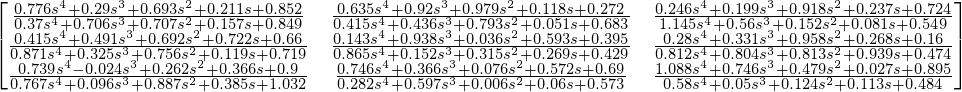

In [6]:
s = sympy.Symbol('s')

ps = [s**4, s**3, s**2, s, 1]

pd = numpy.array([ 0.77582314,  0.28972315,  0.69327607,  0.21121965,  0.85218637,
        0.36978116,  0.70591287,  0.70680975,  0.15726697,  0.84895404,
        0.6347069 ,  0.9200216 ,  0.97883533,  0.11821951,  0.27239318,
        0.41460998,  0.43555365,  0.79269669,  0.05067167,  0.68264733,
        0.24600467,  0.19861715,  0.91797189,  0.23713603,  0.72405204,
        1.14494535,  0.55995608,  0.1515789 ,  0.08085369,  0.549191  ,
        0.41544553,  0.49067678,  0.6918575 ,  0.72223029,  0.65959165,
        0.87120159,  0.32476364,  0.756188  ,  0.11882492,  0.71869754,
        0.14295306,  0.93813737,  0.03629547,  0.59345602,  0.39534087,
        0.86513877,  0.15233181,  0.31490766,  0.26932749,  0.42900127,
        0.28023774,  0.33095211,  0.9575466 ,  0.26818844,  0.16048138,
        0.81152844,  0.80397136,  0.81334852,  0.93898401,  0.47367532,
        0.73865185, -0.02394141,  0.26203415,  0.36618771,  0.89991241,
        0.76728962,  0.09616385,  0.88706412,  0.38492204,  1.03152296,
        0.74562577,  0.36556233,  0.07580174,  0.57171859,  0.69003346,
        0.28205714,  0.59668615,  0.00648067,  0.06000033,  0.57255903,
        1.08781847,  0.74568054,  0.47887871,  0.02714285,  0.89544834,
        0.57982   ,  0.04957753,  0.12376464,  0.11250103,  0.48407762])

pd = numpy.round(pd, 3)

things = numpy.split(pd, 2*N**2)
# nums = numpy.array([sum(t[0]*numpy.poly1d(-numpy.abs(t[1:]), r=True)*ps) for t in things[::2]])
# dens = numpy.array([sum(t[0]*numpy.poly1d(-numpy.abs(t[1:]), r=True)*ps) for t in things[1::2]])
nums = numpy.array([sum(t*ps) for t in things[::2]])
dens = numpy.array([sum(t*ps) for t in things[1::2]])
tf = sympy.Matrix(numpy.reshape(nums/dens, (N, N)))
tf

In [7]:
sympy.print_ccode(tf)

// Not supported in C:
// ImmutableDenseMatrix
Matrix([
[ (0.776*s**4 + 0.29*s**3 + 0.693*s**2 + 0.211*s + 0.852)/(0.37*s**4 + 0.706*s**3 + 0.707*s**2 + 0.157*s + 0.849),  (0.635*s**4 + 0.92*s**3 + 0.979*s**2 + 0.118*s + 0.272)/(0.415*s**4 + 0.436*s**3 + 0.793*s**2 + 0.051*s + 0.683), (0.246*s**4 + 0.199*s**3 + 0.918*s**2 + 0.237*s + 0.724)/(1.145*s**4 + 0.56*s**3 + 0.152*s**2 + 0.081*s + 0.549)],
[(0.415*s**4 + 0.491*s**3 + 0.692*s**2 + 0.722*s + 0.66)/(0.871*s**4 + 0.325*s**3 + 0.756*s**2 + 0.119*s + 0.719), (0.143*s**4 + 0.938*s**3 + 0.036*s**2 + 0.593*s + 0.395)/(0.865*s**4 + 0.152*s**3 + 0.315*s**2 + 0.269*s + 0.429),  (0.28*s**4 + 0.331*s**3 + 0.958*s**2 + 0.268*s + 0.16)/(0.812*s**4 + 0.804*s**3 + 0.813*s**2 + 0.939*s + 0.474)],
[ (0.739*s**4 - 0.024*s**3 + 0.262*s**2 + 0.366*s + 0.9)/(0.767*s**4 + 0.096*s**3 + 0.887*s**2 + 0.385*s + 1.032),   (0.746*s**4 + 0.366*s**3 + 0.076*s**2 + 0.572*s + 0.69)/(0.282*s**4 + 0.597*s**3 + 0.006*s**2 + 0.06*s + 0.573),  (1.088*s**4 + 0.746*s**

In [8]:
sympy.print_latex(tf)

\left[\begin{matrix}\frac{0.776 s^{4} + 0.29 s^{3} + 0.693 s^{2} + 0.211 s + 0.852}{0.37 s^{4} + 0.706 s^{3} + 0.707 s^{2} + 0.157 s + 0.849} & \frac{0.635 s^{4} + 0.92 s^{3} + 0.979 s^{2} + 0.118 s + 0.272}{0.415 s^{4} + 0.436 s^{3} + 0.793 s^{2} + 0.051 s + 0.683} & \frac{0.246 s^{4} + 0.199 s^{3} + 0.918 s^{2} + 0.237 s + 0.724}{1.145 s^{4} + 0.56 s^{3} + 0.152 s^{2} + 0.081 s + 0.549}\\\frac{0.415 s^{4} + 0.491 s^{3} + 0.692 s^{2} + 0.722 s + 0.66}{0.871 s^{4} + 0.325 s^{3} + 0.756 s^{2} + 0.119 s + 0.719} & \frac{0.143 s^{4} + 0.938 s^{3} + 0.036 s^{2} + 0.593 s + 0.395}{0.865 s^{4} + 0.152 s^{3} + 0.315 s^{2} + 0.269 s + 0.429} & \frac{0.28 s^{4} + 0.331 s^{3} + 0.958 s^{2} + 0.268 s + 0.16}{0.812 s^{4} + 0.804 s^{3} + 0.813 s^{2} + 0.939 s + 0.474}\\\frac{0.739 s^{4} - 0.024 s^{3} + 0.262 s^{2} + 0.366 s + 0.9}{0.767 s^{4} + 0.096 s^{3} + 0.887 s^{2} + 0.385 s + 1.032} & \frac{0.746 s^{4} + 0.366 s^{3} + 0.076 s^{2} + 0.572 s + 0.69}{0.282 s^{4} + 0.597 s^{3} + 0.006 s^{2} + 0.0